##### Convert PDF to PNG

In [1]:
!pip install pymupdf

   ---------------------------------------- 0.0/18.4 MB ? eta -:--:--
   - -------------------------------------- 0.5/18.4 MB 2.9 MB/s eta 0:00:07
   -- ------------------------------------- 1.0/18.4 MB 3.1 MB/s eta 0:00:06
   --- ------------------------------------ 1.8/18.4 MB 3.4 MB/s eta 0:00:05
   ------ --------------------------------- 2.9/18.4 MB 3.7 MB/s eta 0:00:05
   --------- ------------------------------ 4.2/18.4 MB 4.3 MB/s eta 0:00:04
   ------------ --------------------------- 5.8/18.4 MB 4.8 MB/s eta 0:00:03
   --------------- ------------------------ 7.3/18.4 MB 5.2 MB/s eta 0:00:03
   -------------------- ------------------- 9.4/18.4 MB 5.9 MB/s eta 0:00:02
   ------------------------- -------------- 11.5/18.4 MB 6.3 MB/s eta 0:00:02
   ----------------------------- ---------- 13.6/18.4 MB 6.7 MB/s eta 0:00:01
   ---------------------------------- ----- 16.0/18.4 MB 7.1 MB/s eta 0:00:01
   ---------------------------------------  18.4/18.4 MB 7.5 MB/s eta 0:00:01
  

In [81]:
import fitz  # PyMuPDF

pdf_path = "assets/drafts/label_print_layout.pdf"
output_path = "assets/drafts/label_print_layout.png"

doc = fitz.open(pdf_path)
page = doc[0]  # first page

pix = page.get_pixmap(dpi=200)  # increase DPI for higher quality
pix.save(output_path)
doc.close()

##### Display PNG

In [19]:
from PIL import Image, ImageDraw, ImageFont

In [48]:
def draw_line(image, direction, coordinate):

    '''
    This function draws rectangles on the template as boundaries for text placement. Use this to preview and adjust
    the placement of text. 
    
    image_loc = file path for event template image
    rect_list = list of tuples; each tuple needs 4 numbers (x1, x2, y1, y2) to define the boundaries of the text box. You'll feed these 
    
    '''
    
    # # Load or create an image
    # image = Image.open(image_loc)
    # draw = ImageDraw.Draw(image)

    if direction == 'h':
        x1, x2 = 0, 1700
        y1 = coordinate
        y2 = y1

    else: 
        y1, y2 = 0, 2200
        x1 = coordinate
        x2 = x1

    draw.line((x1, y1, x2, y2), fill=(255, 0, 0), width=1)  # red line, 5 px thick

    # image.save("output_with_line.png")
    return image

1700 2200


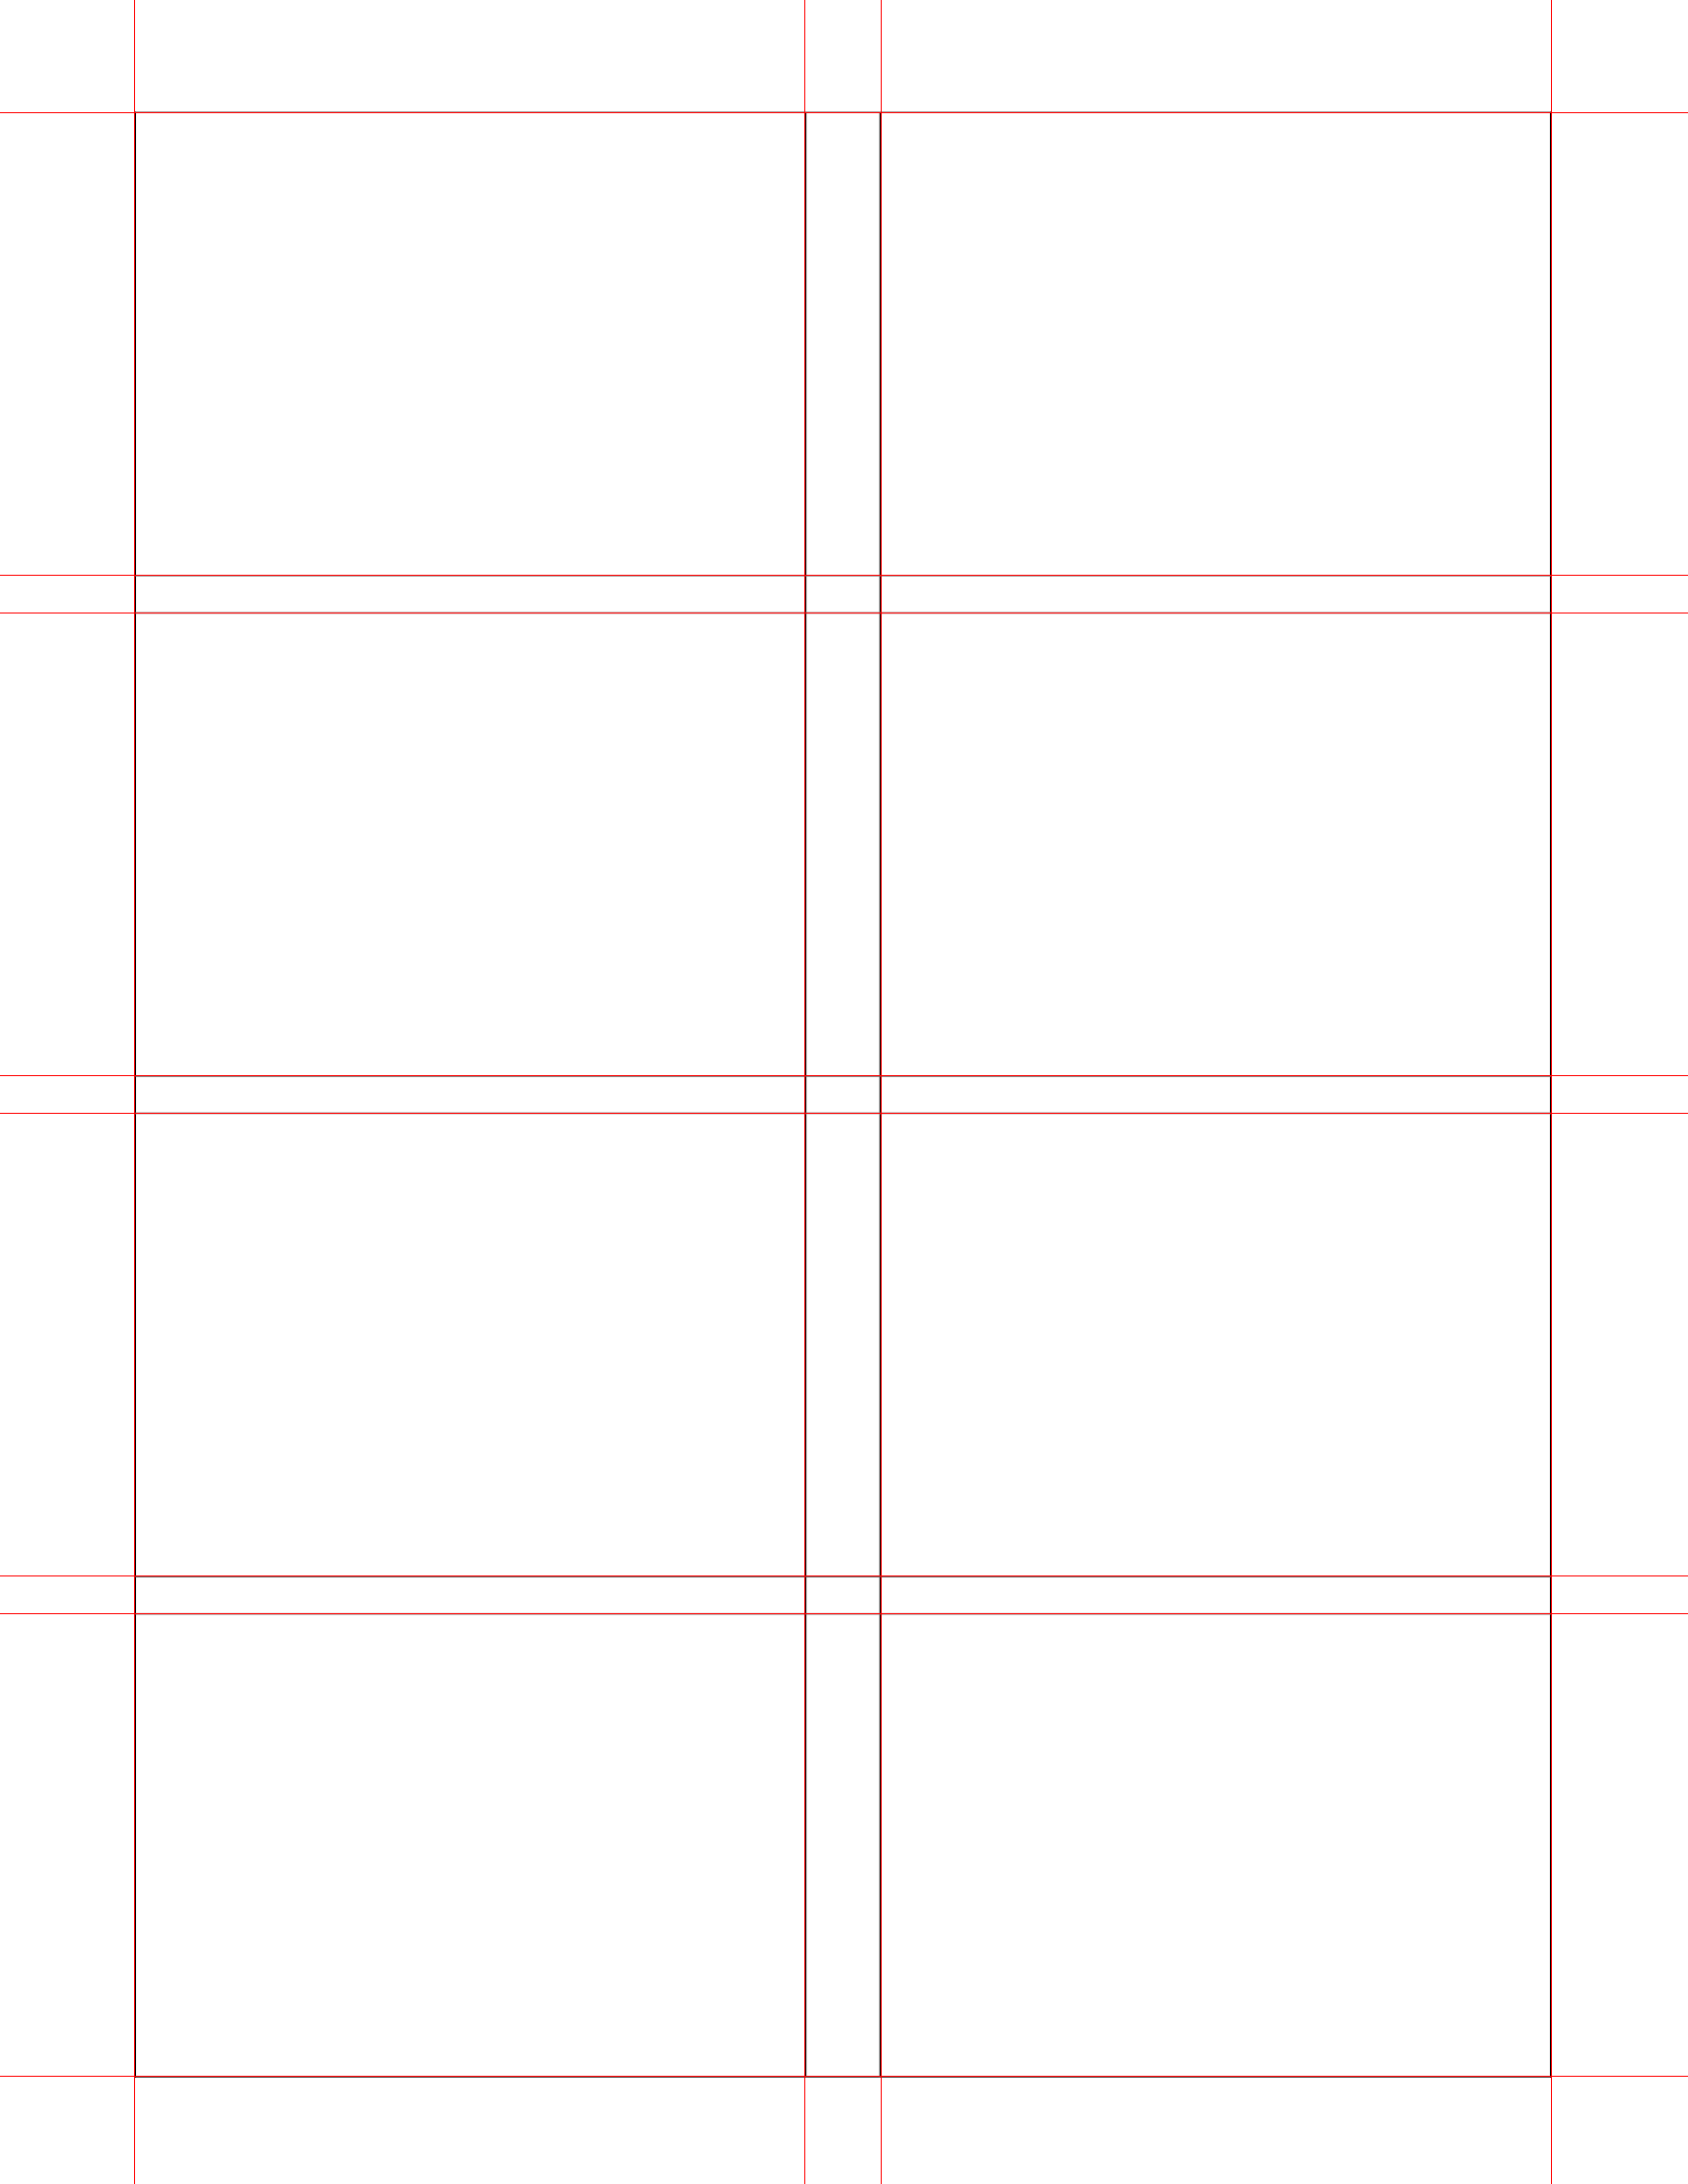

In [82]:
img = Image.open('assets/drafts/label_print_layout.png')
draw = ImageDraw.Draw(img)
width, height = img.size
print(width, height)

badge_height = 466
badge_width = 675
v_gap, h_gap = 38, 77
v_marg, h_marg = 113, 135

h1 = v_marg
h2 = h1 + badge_height
h3 = h2 + v_gap
h4 = h3 + badge_height
h5 = h4 + v_gap
h6 = h5 + badge_height
h7 = h6 + v_gap
h8 = h7 + badge_height

draw_line(img, 'h', h1)
draw_line(img, 'h', h2)
draw_line(img, 'h', h3)
draw_line(img, 'h', h4)
draw_line(img, 'h', h5)
draw_line(img, 'h', h6)
draw_line(img, 'h', h7)
draw_line(img, 'h', h8)

v1 = h_marg
v2 = v1 + badge_width
v3 = v2 + h_gap
v4 = v3 + badge_width

draw_line(img, 'v', v1)
draw_line(img, 'v', v2)
draw_line(img, 'v', v3)
draw_line(img, 'v', v4)

##### Make Nametag Demo 

In [130]:
def draw_section_boundaries(image, r):

    '''
    This function draws rectangles on the template as boundaries for text placement. These aren't intended to show up on final version, it's just 
    intended to preview and adjust the placement of text. 
    
    image = PIL Image object
    r = list of tuples; each tuple needs 4 numbers (x1, x2, y1, y2) to define the boundaries of the text box. You'll feed these 
    
    '''
    
    # Load blank nametag

    draw = ImageDraw.Draw(image)
        
    x1, x2, y1, y2 = r[0], r[1], r[2], r[3]
    
    # Draw left vert
    draw.line((x1, y1, x1, y2), fill=(0, 0, 0), width=1)  # red line, 5 px thick
    # Draw right vert
    draw.line((x2, y1, x2, y2), fill=(0, 0, 0), width=1)  # red line, 5 px thick
    # Draw top horizontal
    draw.line((x1, y1, x2, y1), fill=(0, 0, 0), width=1)  # red line, 5 px thick
    # Draw bottom horizontal
    draw.line((x1, y2, x2, y2), fill=(0, 0, 0), width=1)  # red line, 5 px thick
    
    # image.save("output_with_line.png")
    return image

#### Nametag V1

In [114]:
# Create blank white canvas
nametag_width, nametag_height = 675, 466
nametag = Image.new("RGB", (nametag_width, nametag_height), color="white")

### Outside Border x1, x2, y1, y2
draw_section_boundaries(nametag, (0, 674, 0, 465))

### Name Section Border x1, x2, y1, y2
draw_section_boundaries(nametag, (30, 644, 50, 200))

### Title/Company Section Border x1, x2, y1, y2
draw_section_boundaries(nametag, (30, 644, 225, 325))

### Hobby Section Border x1, x2, y1, y2
draw_section_boundaries(nametag, (30, 644, 340, 415))

nametag.save("assets/drafts/nametag_layout.png")

#### Nametag V2

In [202]:
def add_role_label(image, role):

    if role == 'volunteer':
        color = (105, 182, 113)
        loc = [0, 410, 675, 466]
        text_loc = (240, 418)
        
    elif role == 'mentor':
        color = (5, 160, 202)
        loc = [0, 410, 675, 466]
        text_loc = (275, 418)
    else: 
        return "role not recognized"

    draw = ImageDraw.Draw(image)
    draw.rectangle(loc, outline=color, fill=color)

    font, fill_color, stroke_width, stroke_fill = specify_font_details(weight= 'bold', color = 'white', size = 30, stroke_width = 0, stroke_fill = 'white')
    draw.text(text_loc, role.upper(), font=font, fill=fill_color, stroke_width = stroke_width, stroke_fill = stroke_fill)
    
    return image

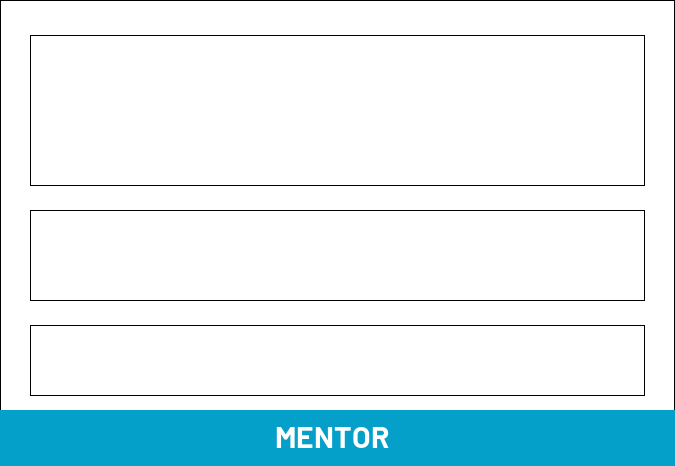

In [203]:
# nametag_width, nametag_height = 675, 466
nametag2 = Image.new("RGB", (nametag_width, nametag_height), color="white")

### Outside Border x1, x2, y1, y2
draw_section_boundaries(nametag2, (0, 674, 0, 465))

### Name Section Border x1, x2, y1, y2
draw_section_boundaries(nametag2, (30, 644, 35, 185))

### Title/Company Section Border x1, x2, y1, y2
draw_section_boundaries(nametag2, (30, 644, 210, 300))

### Hobby Section Border x1, x2, y1, y2
draw_section_boundaries(nametag2, (30, 644, 325, 395))

add_role_label(nametag2, 'mentor')

In [204]:
nametag2.save("assets/drafts/nametag_layout_mentor.png")

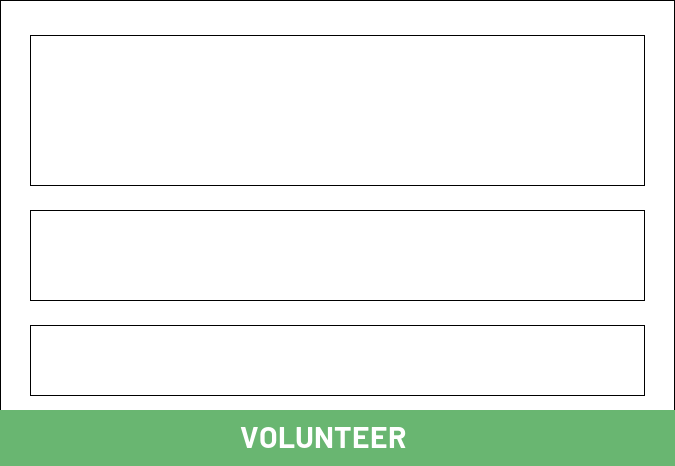

In [205]:
# nametag_width, nametag_height = 675, 466
nametag3 = Image.new("RGB", (nametag_width, nametag_height), color="white")

### Outside Border x1, x2, y1, y2
draw_section_boundaries(nametag3, (0, 674, 0, 465))

### Name Section Border x1, x2, y1, y2
draw_section_boundaries(nametag3, (30, 644, 35, 185))

### Title/Company Section Border x1, x2, y1, y2
draw_section_boundaries(nametag3, (30, 644, 210, 300))

### Hobby Section Border x1, x2, y1, y2
draw_section_boundaries(nametag3, (30, 644, 325, 395))

add_role_label(nametag3, 'volunteer')


#### Add Nametags to Label Template

In [116]:

# Create blank white canvas
canvas_width, canvas_height = 1700, 2200
canvas = Image.new("RGB", (canvas_width, canvas_height), color="white")

# Load smaller PNG
overlay = Image.open("assets/drafts/nametag_layout.png")

# Coordinates (top-left corner where image will be placed)
x, y = v1, h1

# Paste image
canvas.paste(overlay, (v1, h1))
canvas.paste(overlay, (v3, h1))

# Save / display
canvas.save("assets/drafts/label_page_demo.png")
canvas.show()

#### Add Text


The draw_text_in_rectangle function is not working right yet. 

In [127]:
from PIL import Image, ImageDraw, ImageFont

def specify_font_details(weight, color, size, stroke_width = None, stroke_fill = None):
    '''
    weight options: light, regular, thin, medium, bold, semibold, extrabold
    color options: lt_green, med_green, dark_green, yellow, lt_blue, med_blue, black, white, grey
    '''
    
    font_dict = {'light':"assets/Barlow/Barlow-Light.ttf", 'regular':"assets/Barlow/Barlow-Regular.ttf", 'bold':"assets/Barlow/Barlow-Bold.ttf", 'extrabold':"assets/Barlow/Barlow-ExtraBold.ttf", 'medium':"assets/Barlow/Barlow-Medium.ttf", 'semibold':"assets/Barlow/Barlow-SemiBold.ttf", 'thin':"assets/Barlow/Barlow-Thin.ttf"}
    color_dict = {'med_green':(105, 182, 113) , 'dark_green':(0, 64, 41), 'yellow':(247, 205, 70), 'lt_blue':(163, 213, 222), 'med_blue':(5, 160, 202), 'lt_green': (203, 239, 216), 'black':'black', 'white':'white', 'grey':(103, 103, 102)}

    font_path = font_dict[weight]
    
    font = ImageFont.truetype(font_path, size)

    fill_color = color_dict[color]

    if not stroke_width:
        stroke_width = 0
        stroke_fill = 'black'
     
    return font, fill_color, stroke_width, stroke_fill

def draw_text_in_rectangle(
    image_path,
    output_name,
    lines,
    rect,
    font_weight,
    font_color, 
    max_font_size=200,
    line_spacing=1.0,
    stroke_width = None, 
    stroke_fill = None,
    valign="middle",
    halign="center",
):
    """
    Draw multiple lines of text within a given rectangle, aligned vertically and horizontally,
    using the largest possible font size that fits.

    Args:
        image_path (str): Path to input image.
        lines (list[str]): List of text lines to draw.
        rect (tuple): (x, y, width, height) of the rectangle.
        font_weight: options from specify_font_details section -- 'regular', 'bold', 'medium', 'light', 'thin', 'semibold', 'extrabold'
        font_color: options from specify_font_details section -- 'lt_green', 'med_green', 'dark_green', 'yellow', 'lt_blue', 'med_blue', 'black', 'white', 'grey'
        max_font_size (int): Maximum font size to test.
        line_spacing (float): Spacing multiplier between lines (1.0 = normal).
        stroke_width (float): text outline width, defaults to 0
        stroke_fill: text outline color
        valign (str): 'top', 'middle', or 'bottom' vertical alignment.
        halign (str): 'left', 'center', or 'right' horizontal alignment.
    """
    im = Image.open(image_path).convert("RGBA")
    draw = ImageDraw.Draw(im)
    x, y, w, h = rect

    # --- Find largest font size that fits ---
    font_size = max_font_size
    while font_size > 1:
        
        font, fill_color, stroke_width, stroke_fill = specify_font_details(font_weight, font_color, font_size, stroke_width = stroke_width, stroke_fill = stroke_fill)


        line_metrics = []
        max_line_width = 0
        total_height = 0

        for line in lines:
            bbox = draw.textbbox((0, 0), line, font=font)
            width = bbox[2] - bbox[0]
            height = bbox[3] - bbox[1]
            line_metrics.append((width, height))
            max_line_width = max(max_line_width, width)
            total_height += height

        # Add spacing between lines
        total_height += (len(lines) - 1) * (line_metrics[0][1] * (line_spacing - 1 + 0.2))

        if max_line_width <= w and total_height <= h:
            break
        font_size -= 1

    # --- Determine vertical starting point ---
    if valign == "top":
        start_y = y
    elif valign == "bottom":
        start_y = y + h - total_height
    else:  # middle
        start_y = y + (h - total_height) / 2

    # --- Draw each line with horizontal alignment ---
    current_y = start_y
    for (width, height), line in zip(line_metrics, lines):
        if halign == "left":
            text_x = x
        elif halign == "right":
            text_x = x + w - width
        else:  # center
            text_x = x + (w - width) / 2

        draw.text((text_x, current_y), line, font=font, fill=fill_color, stroke_width = stroke_width, stroke_fill = stroke_fill)
        current_y += height * line_spacing

    # draw.text((10, 10), 'KELLY STROH', font=font, fill=fill_color, stroke_width = stroke_width, stroke_fill = stroke_fill)

    im.save(f'drafts/{output_name}.png')
    
    return im

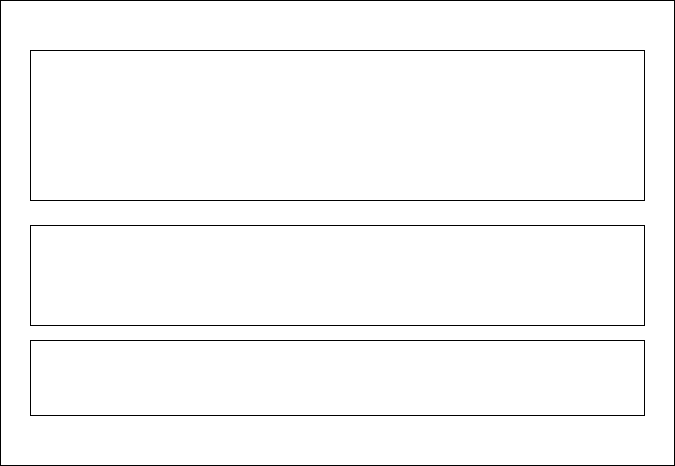

In [128]:
draw_text_in_rectangle(
    image_path = 'assets/drafts/nametag_layout.png',
    output_name = 'assets/drafts/nametag_demo1',
    lines = ['KELLY','STROH'],
    rect = (30, 644, 50, 200),
    font_weight = 'bold',
    font_color = 'black', 
    max_font_size=200,
    line_spacing=1.0,
    stroke_width = 1, 
    stroke_fill = 'black',
    valign="middle",
    halign="center",
)